## h5pyd

In [2]:
import h5pyd

In [7]:
# esto es remoto, coge la info de ~/.hscfg
name = '/home/ecimadevilla/test/tas_3hr_GFDL-ESM2M_rcp85_r1i1p1_2096010100-2100123123.nc4'
file = h5pyd.File(name, 'r')

In [8]:
file.GET('/datasets')

{'datasets': ['d-a48415b3-f9e0a385-2c11-117d01-44de88',
  'd-a48415b3-f9e0a385-3036-7f7382-124906',
  'd-a48415b3-f9e0a385-683b-9a3591-3b6b88',
  'd-a48415b3-f9e0a385-6a30-cc3393-81fb85',
  'd-a48415b3-f9e0a385-7f01-138d36-a5c922',
  'd-a48415b3-f9e0a385-a67f-612f7e-e9c4d2',
  'd-a48415b3-f9e0a385-b5bb-cf1901-010494',
  'd-a48415b3-f9e0a385-dd75-70b380-f70581'],
 'hrefs': [{'rel': 'self',
   'href': 'http://hsds.hdf.test/datasets?domain=/home/ecimadevilla/test/tas_3hr_GFDL-ESM2M_rcp85_r1i1p1_2096010100-2100123123.nc4'},
  {'rel': 'root',
   'href': 'http://hsds.hdf.test/groups/g-a48415b3-f9e0a385-2c0c-9d3b71-682b0d?domain=/home/ecimadevilla/test/tas_3hr_GFDL-ESM2M_rcp85_r1i1p1_2096010100-2100123123.nc4'},
  {'rel': 'home',
   'href': 'http://hsds.hdf.test/?domain=/home/ecimadevilla/test/tas_3hr_GFDL-ESM2M_rcp85_r1i1p1_2096010100-2100123123.nc4'}]}

In [9]:
file.GET('/datasets/d-a48415b3-f9e0a385-a67f-612f7e-e9c4d2/value')

{'value': [-89.49438202247192,
  -87.97752808988764,
  -85.95505617977527,
  -83.93258426966293,
  -81.91011235955057,
  -79.88764044943821,
  -77.86516853932585,
  -75.84269662921348,
  -73.82022471910112,
  -71.79775280898876,
  -69.7752808988764,
  -67.75280898876404,
  -65.73033707865169,
  -63.707865168539335,
  -61.68539325842697,
  -59.662921348314605,
  -57.64044943820225,
  -55.61797752808988,
  -53.59550561797753,
  -51.573033707865164,
  -49.5505617977528,
  -47.52808988764045,
  -45.50561797752808,
  -43.48314606741573,
  -41.46067415730337,
  -39.43820224719101,
  -37.41573033707865,
  -35.39325842696629,
  -33.370786516853926,
  -31.348314606741578,
  -29.325842696629216,
  -27.303370786516854,
  -25.280898876404496,
  -23.258426966292138,
  -21.235955056179776,
  -19.213483146067418,
  -17.19101123595506,
  -15.168539325842703,
  -13.146067415730343,
  -11.123595505617978,
  -9.101123595505612,
  -7.078651685393254,
  -5.056179775280896,
  -3.0337078651685374,
  -1.01123

## xarray

In [2]:
import xarray

In [5]:
name = '/home/ecimadevilla/test/tas_3hr_GFDL-ESM2M_rcp85_r1i1p1_2096010100-2100123123.nc4'
url = 'http://hsds.hdf.test' + name
ds = xarray.open_dataset(url, engine='h5netcdf', decode_cf=True)

In [6]:
ds

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 90, lon: 144, time: 14600)
Coordinates:
    height    float64 ...
  * lat       (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.3 353.8 356.2 358.8
  * time      (time) datetime64[ns] 2095-12-10T03:00:00 ... 2100-12-09
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 ...
    lon_bnds  (lon, bnds) float64 ...
    tas       (time, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.4
    branch_time:            52925
    comment:                GFDL experiment name = ESM2M-HC1_2006-2100_all_rc...
    contact:                gfdl.climate.model.info@noaa.gov
    creation_date:          2011-08-12T11:15:28Z
    experiment:             RCP8.5
    experiment_id:          rcp85
    forcing:                GHG,SD,Oz,LU,SS,BC,MD,OC (GHG includes CO2, CH4, ...
    frequency:              3hr
    gfdl_experiment_name:   ESM2M-HC1

In [30]:
# look at network monitor
# download is interrumped at certain invertals, ¿maybe caused by server size limit?
ds.tas.mean(dim='time').load()

<xarray.DataArray 'tas' (lat: 90, lon: 144)>
array([[233.48705, 233.48735, 233.48793, ..., 233.45572, 233.45631, 233.43767],
       [234.05307, 233.94182, 233.63   , ..., 234.50275, 234.31013, 234.15027],
       [236.78702, 236.41496, 235.72119, ..., 237.50478, 237.20023, 237.0502 ],
       ...,
       [263.18103, 263.2934 , 263.36902, ..., 263.02756, 263.07593, 263.11346],
       [262.93463, 263.03345, 263.04224, ..., 262.9179 , 262.8997 , 262.9565 ],
       [262.81073, 262.8108 , 262.81204, ..., 262.81052, 262.81067, 262.8107 ]],
      dtype=float32)
Coordinates:
    height   float64 2.0
  * lat      (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.3 353.8 356.2 358.8

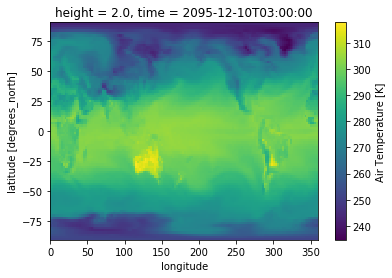

In [46]:
ds['tas'].sel(time='2095-12-10T03').plot()

In [7]:
ds.chunks

Frozen(SortedKeysDict({}))

## chunked

In [8]:
url = 'http://hsds.hdf.test/home/ecimadevilla/test/rechunked.nc'
dsc = xarray.open_dataset(url, engine='h5netcdf', decode_cf=True)
tas = dsc['tas']

In [9]:
tas.encoding

{'chunksizes': (1460, 9, 30),
 'fletcher32': False,
 'shuffle': False,
 'source': 'http://hsds.hdf.test/home/ecimadevilla/test/rechunked.nc',
 'original_shape': (14600, 90, 144),
 'dtype': dtype('float32'),
 'missing_value': array([1.e+20], dtype=float32),
 '_FillValue': array([1.e+20], dtype=float32),
 'coordinates': 'height'}

In [10]:
dsc.chunks # aunq el hdf5 sea chunked esto se refiere a chunks de Dask

Frozen(SortedKeysDict({}))

# dask

In [12]:
import xarray

In [13]:
url = 'http://hsds.hdf.test/home/ecimadevilla/test/rechunked.nc'
ds = xarray.open_dataset(url, engine='h5netcdf', decode_cf=True, chunks={'time': 1460})

In [14]:
ds

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 90, lon: 144, time: 14600)
Coordinates:
    height    float64 ...
  * lat       (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.3 353.8 356.2 358.8
  * time      (time) object 2096-01-01 03:00:00 ... 2101-01-01 00:00:00
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 dask.array<shape=(90, 2), chunksize=(90, 2)>
    lon_bnds  (lon, bnds) float64 dask.array<shape=(144, 2), chunksize=(144, 2)>
    tas       (time, lat, lon) float32 dask.array<shape=(14600, 90, 144), chunksize=(1460, 90, 144)>
Attributes:
    Conventions:            CF-1.4
    branch_time:            52925
    comment:                GFDL experiment name = ESM2M-HC1_2006-2100_all_rc...
    contact:                gfdl.climate.model.info@noaa.gov
    creation_date:          2011-08-12T11:15:28Z
    experiment:             RCP8.5
    experiment_id:          rcp85
    for

In [15]:
ds.chunks

Frozen(SortedKeysDict({'lat': (90,), 'bnds': (2,), 'lon': (144,), 'time': (1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460, 1460)}))

In [27]:
import dask.array as da
ds['tas'].mean(dim='time').visualize()

AttributeError: 'DataArray' object has no attribute 'visualize'

In [39]:
from dask.diagnostics import Profiler, ResourceProfiler, CacheProfiler, ProgressBar

# every 50s it updates progess bar in 8%
# if executed 2 times, it has to download again
with Profiler() as prof, ResourceProfiler(dt=0.25) as rprof, CacheProfiler() as cprof, ProgressBar():
    ds['tas'].mean(dim='time').load()

[########################################] | 100% Completed |  8min 53.3s


In [40]:
from dask.diagnostics import visualize

# benchmarkChunkedLocalscheduler.html
visualize([prof, rprof, cprof])

Column(id='5301', ...)

## dask cmip6

In [1]:
import h5pyd, xarray

In [11]:
ranges = ['200501010030-200912312330'] #,'201001010030-201412312330'] # memory error #, '20190330_0000', '20190331_0000']
base = 'https://esg1.umr-cnrm.fr/thredds/dodsC/CMIP6_CNRM/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r1i1p1f2/AERhr/tas/gr/v20181206/tas_AERhr_CNRM-ESM2-1_historical_r1i1p1f2_gr'
urls = [f'{base}_{time_range}.nc'
        for time_range in ranges]
urls

['https://esg1.umr-cnrm.fr/thredds/dodsC/CMIP6_CNRM/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r1i1p1f2/AERhr/tas/gr/v20181206/tas_AERhr_CNRM-ESM2-1_historical_r1i1p1f2_gr_200501010030-200912312330.nc']

In [3]:
# using netcdf4 (pydap does not work)
ds = xarray.open_mfdataset(urls, engine="netcdf4", chunks={'time': 1000})

In [4]:
ds.chunks

Frozen(SortedKeysDict({'time': (1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 824, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 824), 'axis_nbounds': (2,), 'lat': (128,), 'lon': (256,)}))

In [5]:
ds

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 128, lon: 256, time: 87648)
Coordinates:
  * lat          (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon          (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    height       float64 2.0
  * time         (time) datetime64[ns] 2005-01-01T00:30:00 ... 2014-12-31T23:30:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] dask.array<shape=(87648, 2), chunksize=(1000, 2)>
    tas          (time, lat, lon) float32 dask.array<shape=(87648, 128, 256), chunksize=(1000, 128, 256)>
Attributes:
    Conventions:                     CF-1.7 CMIP-6.2
    creation_date:                   2018-10-25T06:19:05Z
    description:                     CMIP6 historical
    title:                           CNRM-ESM2-1 model output prepared for CM...
    activity_id:                     CMIP
    contact:                         contact.cmip@meteo.fr

In [ ]:
ds['tas'].mean(dim='time').load()